In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.matlib

In [2]:
def Perceptron_mis_yx(y = None,x = None,w = None,n_epoch = None,eta = None): 
    #n_sample = y.shape[1-1] / 2
    x_c1 = x[1:n_sample, :]
    x_c2 = x[n_sample+1:n_sample * 2,:]
    yx = np.multiply(np.matlib.repmat(y, 1,3),x)
    print('----- Perceptron_mis_yx() started -----\n' % ())
    for e in np.arange(1,n_epoch+1).reshape(-1):
        #     for i=1:n_sample*2
        #wyx = np.dot(np.matlib.repmat((w,n_sample * 2),1),yx,2)
        wyx = np.multiply(np.matlib.repmat(w, n_sample*2, 1), yx).sum(axis=1)
        #     idx = find(wx2 < 0);
        yx_misclassified = yx[wyx < 0,:]
        w = w + sum(yx_misclassified)
        #         w = w + eta*(sum(yx_misclassified)-2*0.001*w);
        err = sum(wyx < 0)
        print('err = %d\n' % (err))
        plt.figure(2)
        plt.xlim(np.array([- 5,10]))
        plt.ylim(np.array([- 5,10]))
        plt.axis('equal')

        drawDataHyperplane(x_c1,x_c2,w,'k')

        if err == 0:
            break
    
    ret1 = e

In [3]:
def Perceptron_l2(y = None,x = None,w = None,n_epoch = None,eta = None): 
    #n_sample = y.shape[1-1] / 2
    x_c1 = x[np.arange(1,n_sample+1),:]
    x_c2 = x[np.arange(n_sample + 1,n_sample * 2+1),:]
    print('----- Perceptron_l2() started -----\n' % ())
    for e in np.arange(1,n_epoch+1).reshape(-1):
        #     for i=1:n_sample*2
        wx = np.dot(np.matlib.repmat(w,n_sample * 2,1),x,2)
        diff = np.multiply(np.matlib.repmat((y - wx),1,3),x)
        w = w + eta * sum(diff)
        #     w = w/max(abs(w));
        err1 = 1 / 2 * sum((y - wx) ** 2)
        err2 = sum(np.multiply(y,wx) < 0)
        print('err(%d) = %f %d\n' % (e,err1,err2))
        plt.figure(3)
        plt.xlim(np.array([- 5,10]))
        plt.ylim(np.array([- 5,10]))
        plt.axis('equal')
       
        drawDataHyperplane(x_c1,x_c2,w,'k')
       
        if err2 == 0:
            break
    
    ret2 = e

In [4]:
def Perceptron_l2_reg(y = None,x = None,w = None,n_epoch = None,eta = None,lamda = None): 
    n_sample = y.shape[1-1] / 2
    x_c1 = x[np.arange(1,n_sample+1),:]
    x_c2 = x[np.arange(n_sample + 1,n_sample * 2+1),:]
    print('----- Perceptron_l2_reg() started -----\n' % ())
    for e in np.arange(1,n_epoch+1).reshape(-1):
        #wx = np.dot(np.matlib.repmat(w,n_sample * 2,1),x,2)
        wx = sum((np.tile(w, (n_sample*2, 1)))*x)
        diff = np.multiply(np.matlib.repmat((y - wx),1,3),x)
        w = w + eta * (sum(diff) - 2 * lamda * w * n_sample * 2)
        err1 = 1 / 2 * sum((y - wx) ** 2)
        err2 = sum(np.multiply(y,wx) < 0)
        print('err(%d) = %f %d\n' % (e,err1,err2))
        plt.figure(4)
        plt.xlim(np.array([- 5,10]))
        plt.ylim(np.array([- 5,10]))
        plt.axis('equal')
        hold('on')
        drawDataHyperplane(x_c1,x_c2,w,'k')
        hold('off')
        if err2 == 0:
            break
    
    ret3 = e

In [5]:
def drawData(x_c1 = None,x_c2 = None): 
    plt.plot(x_c1[:,1],x_c1[:,2],'+b')
    plt.plot(x_c2[:,1],x_c2[:,2],'or')

In [6]:
def drawLine(w = None,col = None): 
    x = np.arange(- 5,10+0.1,0.1)
    y = - w[:,0] / w[:,2] - w[:,1] / w[:,2] * x
    plt.plot(x,y,col)

In [7]:
def drawDataHyperplane(x_c1 = None,x_c2 = None,w = None,col = None): 
    
    drawData(x_c1,x_c2)
    drawLine(w,col)


[[[ 1.        1.409     1.7665  ]
  [ 1.        1.4172    0.81191 ]
  [ 1.        0.6715    0.606   ]
  [ 1.       -1.2075   -1.2225  ]
  [ 1.        0.71724   0.78105 ]
  [ 1.        1.6302    1.6464  ]
  [ 1.        0.48889   0.19439 ]
  [ 1.        1.0347    0.97357 ]
  [ 1.        0.72689   0.63906 ]
  [ 1.       -0.30344  -0.092267]
  [ 1.        0.29387   0.62055 ]
  [ 1.       -0.78728  -0.40155 ]
  [ 1.        0.8884    0.5743  ]
  [ 1.       -1.1471   -1.0656  ]
  [ 1.       -1.0689   -1.3945  ]
  [ 1.       -0.8095   -1.1167  ]
  [ 1.       -2.9443   -2.7992  ]
  [ 1.        1.4384    1.845   ]
  [ 1.        0.32519   0.068603]
  [ 1.       -0.75493  -0.60122 ]]

 [[ 1.        0.77442   4.7148  ]
  [ 1.        2.1174    5.8465  ]
  [ 1.       -0.089064  4.822   ]
  [ 1.        1.0326    5.1813  ]
  [ 1.        1.5525    5.5739  ]
  [ 1.        2.1006    6.7719  ]
  [ 1.        2.5442    5.8888  ]
  [ 1.        1.0859    5.44    ]
  [ 1.       -0.49159   4.1721  ]
  [ 1.      

ValueError: too many values to unpack (expected 2)

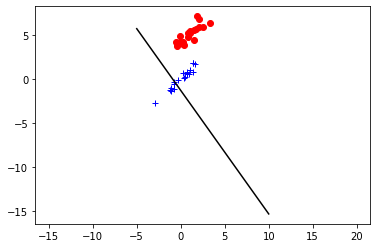

In [8]:
n_sample = 20
    # x_c1 = mvnrnd([0, 0], [1, .95; .95, 1.], n_sample);
# x_c2 = mvnrnd([1, 5], [1, .85; .85, 1.], n_sample);
# dlmwrite('x_c1', x_c1);
# dlmwrite('x_c2', x_c2);
x_c1 = np.loadtxt("x_c1.txt", delimiter = ",")
x_c2 = np.loadtxt("x_c2.txt", delimiter = ",")
    # add bias term
x_c1 = np.append(np.ones((n_sample,1)), x_c1, axis= 1)
x_c2 = np.append(np.ones((n_sample,1)), x_c2, axis = 1)
    # label
y1 = np.ones((n_sample,1)) *(-1) 
    
y2 = np.ones((n_sample,1))
    
    # figure(1); xlim([-5 10]); ylim([-5 10])
# hold on
# plot(x_c1(:,2), x_c1(:,3), 'or');
# plot(x_c2(:,2), x_c2(:,3), '+b');
# hold off
    
x = np.array([x_c1,x_c2])
print(x)
y = np.array([y1,y2])
print(y)
    # yx = repmat(y,1,3).*x; # yx
    
w = np.random.rand(1,3)
plt.figure(1)
plt.xlim(np.array([- 5,10]))
plt.ylim(np.array([- 5,10]))
plt.axis('equal')
drawDataHyperplane(x_c1,x_c2,w,'k')
    # w <- w+sum(misclassified yx), Fig(2)
n_epoch = 100
eta = 0.001
ret1 = Perceptron_mis_yx(y,x,w,n_epoch,eta)
    # w <- w+sum(squared error), Fig(3)
n_epoch = 100
eta = 0.001
ret2 = Perceptron_l2(y,x,w,n_epoch,eta)

print('ret1 = %d, ret2 = %d, ret3 = %d \n' % (ret1,ret2,ret3))